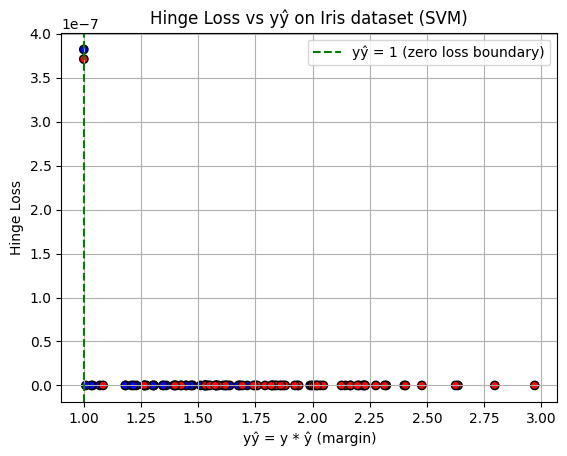

In [1]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

# Load Iris data (binary classification: class 0 vs class 1)
iris = datasets.load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Convert labels from {0,1} to {-1,1} for hinge loss
y_transformed = np.where(y == 0, -1, 1)

# Train linear SVM without regularization to get raw decision scores
svm = LinearSVC(C=1e6, max_iter=10000, dual=False)
svm.fit(X, y)

# Get decision function values (ŷ, raw scores before sign)
decision_scores = svm.decision_function(X)

# Calculate yŷ = y * ŷ
yyhat = y_transformed * decision_scores

# Calculate hinge loss
hinge_loss = np.maximum(0, 1 - yyhat)

# Plot
plt.scatter(yyhat, hinge_loss, c=y_transformed, cmap='bwr', edgecolor='k')
plt.axvline(x=1, color='green', linestyle='--', label='yŷ = 1 (zero loss boundary)')
plt.xlabel('yŷ = y * ŷ (margin)')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss vs yŷ on Iris dataset (SVM)')
plt.legend()
plt.grid(True)
plt.show()
